Gradient Descent:
20.5 ms ± 812 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
SGD:
869 ms ± 226 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 
RMSProp:
27.9 ms ± 677 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
Adam:
38.4 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
Nadam:
44.9 ms ± 7.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 


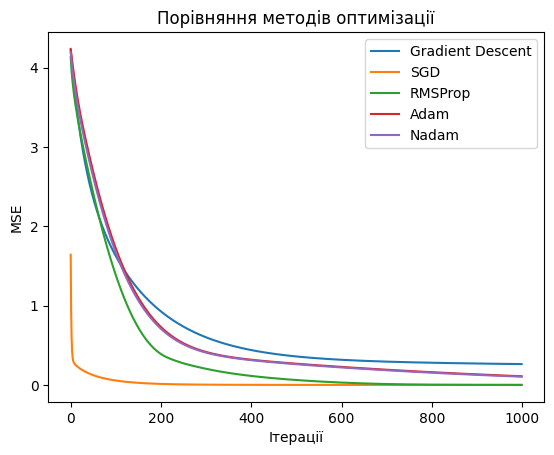


Висновок:

Для невеликих обсягів даних класичний градієнтний спуск або SGD можуть бути ефективними. 

Однак для великих наборів даних та задач зі складними функціями втрат методи Adam і Nadam
 зазвичай демонструють найкращі результати завдяки їхній швидкій збіжності, 
 адаптивності та стабільності.



In [3]:
import numpy as np
import time
from sklearn.preprocessing import PolynomialFeatures

# Крок 1: Генерація даних
# Встановлюємо фіксоване значення для генератора випадкових чисел для відтворюваності
np.random.seed(42)

def polynomial(x1, x2):
    # Функція обчислює значення полінома другого степеня для заданих x1 і x2
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

# Генеруємо 100 випадкових значень для ознак x1 і x2
x1 = np.random.rand(100)
x2 = np.random.rand(100)
# Обчислюємо цільову змінну y за допомогою полінома
y = polynomial(x1, x2)
# Об'єднуємо x1 і x2 в одну матрицю ознак
X = np.column_stack((x1, x2))

# Крок 2: Генерація поліноміальних ознак
# Використовуємо PolynomialFeatures для створення нових ознак до другого степеня
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Варіанти градієнтного спуску

def mean_squared_error(y_true, y_pred):
    # Функція обчислює середньоквадратичну похибку між справжніми та передбаченими значеннями
    return np.mean((y_true - y_pred)**2)

def polynomial_regression_gradient_descent(X, y, lr=0.01, iterations=1000):
    # Реалізація стандартного методу градієнтного спуску
    m, n = X.shape  # Кількість прикладів (m) та ознак (n)
    theta = np.zeros(n)  # Ініціалізуємо коефіцієнти нулями
    losses = []  # Список для збереження значень похибки
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Обчислюємо градієнти
        theta -= lr * gradients  # Оновлюємо коефіцієнти
        losses.append(mean_squared_error(y, X.dot(theta)))  # Зберігаємо похибку
    return theta, losses

def polynomial_regression_SGD(X, y, lr=0.01, iterations=1000):
    # Реалізація стохастичного градієнтного спуску (SGD)
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    for _ in range(iterations):
        for i in range(m):
            gradients = 2 * X[i].T.dot(X[i].dot(theta) - y[i])  # Градієнт для одного прикладу
            theta -= lr * gradients  # Оновлення коефіцієнтів
        losses.append(mean_squared_error(y, X.dot(theta)))  # Збереження похибки
    return theta, losses

def polynomial_regression_rmsprop(X, y, lr=0.01, iterations=1000, beta=0.9, epsilon=1e-8):
    # Реалізація методу RMSProp
    m, n = X.shape
    theta = np.zeros(n)
    sq_grads = np.zeros(n)  # Експоненціально зважене середнє квадратів градієнтів
    losses = []
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Обчислення градієнтів
        sq_grads = beta * sq_grads + (1 - beta) * gradients**2  # Оновлення середнього
        theta -= lr * gradients / (np.sqrt(sq_grads) + epsilon)  # Оновлення коефіцієнтів
        losses.append(mean_squared_error(y, X.dot(theta)))  # Збереження похибки
    return theta, losses

def polynomial_regression_adam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Реалізація методу Adam
    m, n = X.shape
    theta = np.zeros(n)
    m_grads = np.zeros(n)  # Експоненціально зважене середнє градієнтів
    v_grads = np.zeros(n)  # Експоненціально зважене середнє квадратів градієнтів
    losses = []
    for t in range(1, iterations + 1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Обчислення градієнтів
        m_grads = beta1 * m_grads + (1 - beta1) * gradients  # Оновлення m
        v_grads = beta2 * v_grads + (1 - beta2) * gradients**2  # Оновлення v
        m_hat = m_grads / (1 - beta1**t)  # Корекція зміщення для m
        v_hat = v_grads / (1 - beta2**t)  # Корекція зміщення для v
        theta -= lr * m_hat / (np.sqrt(v_hat) + epsilon)  # Оновлення коефіцієнтів
        losses.append(mean_squared_error(y, X.dot(theta)))  # Збереження похибки
    return theta, losses

def polynomial_regression_nadam(X, y, lr=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Реалізація методу Nadam
    m, n = X.shape
    theta = np.zeros(n)
    m_grads = np.zeros(n)
    v_grads = np.zeros(n)
    losses = []
    for t in range(1, iterations + 1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)  # Обчислення градієнтів
        m_grads = beta1 * m_grads + (1 - beta1) * gradients  # Оновлення m
        v_grads = beta2 * v_grads + (1 - beta2) * gradients**2  # Оновлення v
        m_hat = m_grads / (1 - beta1**t)  # Корекція зміщення для m
        v_hat = v_grads / (1 - beta2**t)  # Корекція зміщення для v
        theta -= lr * (beta1 * m_hat + (1 - beta1) * gradients / (1 - beta1**t)) / (np.sqrt(v_hat) + epsilon)  # Оновлення коефіцієнтів
        losses.append(mean_squared_error(y, X.dot(theta)))  # Збереження похибки
    return theta, losses

# Крок 4: Вимірювання часу роботи методів
# Використовуємо магічну команду %timeit для оцінки часу виконання
print("Gradient Descent:")
%timeit polynomial_regression_gradient_descent(X_poly, y)
print(" ")

print("SGD:")
%timeit polynomial_regression_SGD(X_poly, y)
print(" ")

print("RMSProp:")
%timeit polynomial_regression_rmsprop(X_poly, y)
print(" ")

print("Adam:")
%timeit polynomial_regression_adam(X_poly, y)
print(" ")

print("Nadam:")
%timeit polynomial_regression_nadam(X_poly, y)
print(" ")

# Крок 5: Експеримент з кількістю ітерацій
import matplotlib.pyplot as plt

def plot_losses(losses, label):
    # Функція для візуалізації зміни похибки протягом ітерацій
    plt.plot(losses, label=label)

iterations = 1000  # Кількість ітерацій для порівняння методів

# Виконання кожного з методів і збереження їхніх похибок
_, gd_losses = polynomial_regression_gradient_descent(X_poly, y, iterations=iterations)
_, sgd_losses = polynomial_regression_SGD(X_poly, y, iterations=iterations)
_, rmsprop_losses = polynomial_regression_rmsprop(X_poly, y, iterations=iterations)
_, adam_losses = polynomial_regression_adam(X_poly, y, iterations=iterations)
_, nadam_losses = polynomial_regression_nadam(X_poly, y, iterations=iterations)

# Побудова графіків для всіх методів
plot_losses(gd_losses, label="Gradient Descent")
plot_losses(sgd_losses, label="SGD")
plot_losses(rmsprop_losses, label="RMSProp")
plot_losses(adam_losses, label="Adam")
plot_losses(nadam_losses, label="Nadam")

# Налаштування графіку
plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.title("Порівняння методів оптимізації")
plt.legend()
plt.show()

print("""
Висновок:

Для невеликих обсягів даних класичний градієнтний спуск або SGD можуть бути ефективними.

Однак для великих наборів даних та задач зі складними функціями втрат методи Adam і Nadam
 зазвичай демонструють найкращі результати завдяки їхній швидкій збіжності,
 адаптивності та стабільності.
""")